#Task B

##B3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def function(x):
  return -np.exp(-(x-3.14)**2)

In [3]:
y_x = np.vectorize(function)

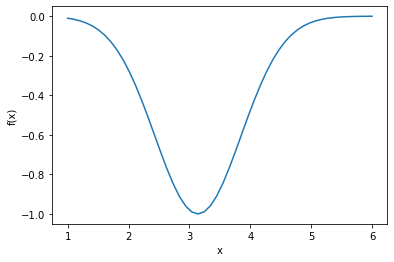

In [4]:
x_plot = np.linspace(1, 6)
y_plot = y_x(x_plot)
plt.plot(x_plot, y_plot)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [5]:
from sympy import *

In [6]:
x = symbols('x')
f = -exp(-(x-3.14)**2)

In [7]:
def gradient_descent(f, max_num_iter, learning_rate_decrease_factor, learning_rate_0):
  trajectory_x = []
  trajectory_fx = []
  df = diff(f)
  t = 0
  xt = 3
  trajectory_x.append(xt)
  trajectory_fx.append(f.subs(x, xt))
  learning_rate_t = learning_rate_0
  while t < max_num_iter:
    step_length = learning_rate_t*df.subs(x, xt)
    xt = xt - step_length
    trajectory_x.append(xt)
    trajectory_fx.append(f.subs(x, xt))
    learning_rate_t *= 1-learning_rate_decrease_factor
    t += 1
  return trajectory_x, trajectory_fx

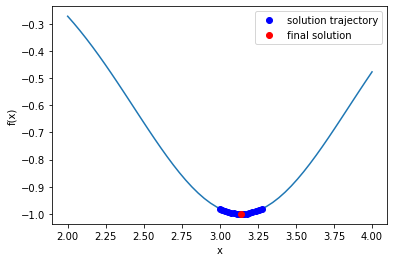

Optimal point: (3.14, -1)


In [8]:
trajectory_x, trajectory_fx = gradient_descent(f, 50, 0.01, 1)
x_plot = np.linspace(2, 4)
y_plot = y_x(x_plot)
plt.plot(x_plot, y_plot)
plt.plot(trajectory_x[:-1], trajectory_fx[:-1], 'bo', label='solution trajectory')
plt.plot(trajectory_x[-1], trajectory_fx[-1], 'ro', label='final solution')
plt.plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
print(f'Optimal point: ({round(trajectory_x[-1], 2)}, {round(trajectory_fx[-1])})')

##B4

In [9]:
def surface(r):
  return 2*(355/r) + 2*math.pi*(r**2)

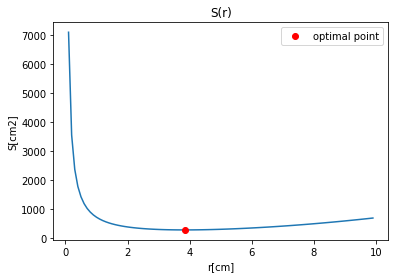

In [10]:
surface_vector = np.vectorize(surface)
r_plot = np.arange(0.1, 10, 0.1)
s_plot = surface_vector(r_plot)
plt.plot(r_plot, s_plot)
plt.plot(3.837, 278, 'ro', label='optimal point')
plt.title('S(r)')
plt.xlabel('r[cm]')
plt.ylabel('S[cm2]')
plt.legend()
plt.show()

#Task C

##C1

In [11]:
import torch
from torch import autograd

In [12]:
def f(x):
  return torch.pow(x-1, 4) + 3

In [13]:
x0 = torch.tensor(2.0, requires_grad=True)
fx0 = f(x0)
fx0.backward()
x0.grad

tensor(4.)

##C2

In [14]:
def g(x,y,z):
  return x*y + x*z + y*z + torch.pow(x, 2) +  torch.pow(math.e, y) +  z*torch.sin(x)

In [15]:
x0 = torch.tensor(math.pi, requires_grad=True)
y0 = torch.tensor(2.0, requires_grad=True)
z0 = torch.tensor(2.0, requires_grad=True)

g_value = g(x0, y0, z0)
g_value.backward()

print(x0.grad)
print(y0.grad)
print(z0.grad)

tensor(8.2832)
tensor(12.5306)
tensor(5.1416)


#Task D

##D1

In [16]:
def f_plot(x):
  return -math.exp(-(x-math.pi)**2) + 0.01*(x-math.pi)**2

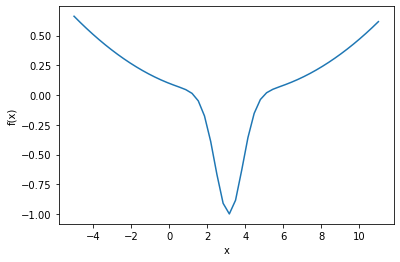

In [17]:
y_x = np.vectorize(f_plot)
x_plot = np.linspace(-5, 11)
y_plot = y_x(x_plot)
plt.plot(x_plot, y_plot)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [18]:
def f(x):
  return -torch.pow(math.e, -torch.pow(x-math.pi, 2)) + 0.01*torch.pow(x-math.pi, 2)

In [19]:
nr_steps = 100

solutions = np.zeros((nr_steps, 3))
etas = [1, 0.1, 0.01]

for j in range(len(etas)):

  x = torch.tensor(3.0, requires_grad=True)
  solutions[0, j] = x
  
  for i in range(1, nr_steps):
    fx = f(x)
    fx.backward()

    with torch.no_grad():
      x -= etas[j] * x.grad

    x.grad.zero_()

    solutions[i, j] = x

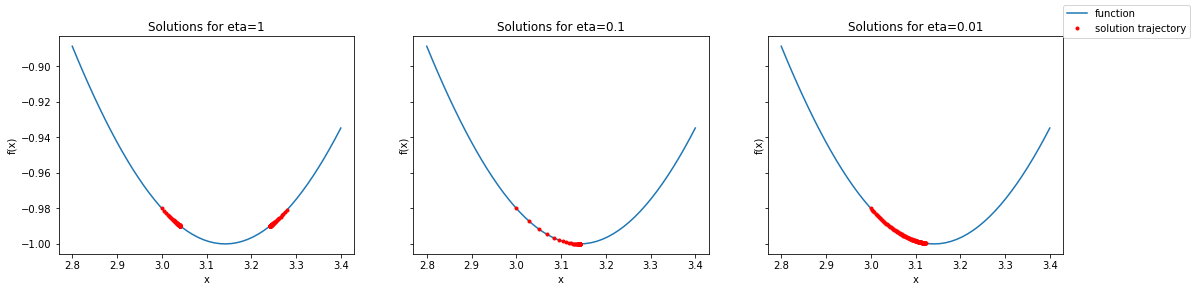

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)

fig.set_size_inches(18, 4)

x_plot = np.linspace(2.8, 3.4)
y_plot = y_x(x_plot)

ax1.plot(x_plot, y_plot, label='function')
ax1.plot(solutions[:, 0], y_x(solutions[:, 0]), 'ro', markersize=3, label='solution trajectory')
ax1.set_title('Solutions for eta=1')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')

ax2.plot(x_plot, y_plot)
ax2.plot(solutions[:, 1], y_x(solutions[:, 1]), 'ro', markersize=3)
ax2.set_title('Solutions for eta=0.1')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')

ax3.plot(x_plot, y_plot)
ax3.plot(solutions[:, 2], y_x(solutions[:, 2]), 'ro', markersize=3)
ax3.set_title('Solutions for eta=0.01')
ax3.set_xlabel('x')
ax3.set_ylabel('f(x)')

fig.legend()
plt.show()

In [21]:
print(f'eta=1\t\tx={round(solutions[-1, 0], 2)}')
print(f'eta=0.1\t\tx={round(solutions[-1, 1], 2)}')
print(f'eta=0.01\tx={round(solutions[-1, 2], 2)}')

eta=1		x=3.24
eta=0.1		x=3.14
eta=0.01	x=3.12


eta=1: the solution zig-zags around the optimal point, the learning rate is too high

eta=0.1: the solution converges to the optimal point, the learning rate is apropiate

eta=0.01: the solution doesn't reach the deep, the learning rate is too low

##D2

In [22]:
def f(x1, x2):
  return torch.pow(x1-3, 2) + torch.pow(x2-3, 2)

In [23]:
trajectory_x1 = []
trajectory_x2 = []

nr_steps = 200
eta = 0.01

x = torch.tensor([1.0, 1.0], requires_grad=True)
trajectory_x1.append(x[0].item())
trajectory_x2.append(x[1].item())

for i in range(1, nr_steps):
  fx = f(x[0], x[1])
  fx.backward()

  with torch.no_grad():
    x -= eta * x.grad

  x.grad.zero_()

  trajectory_x1.append(x[0].item())
  trajectory_x2.append(x[1].item())

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


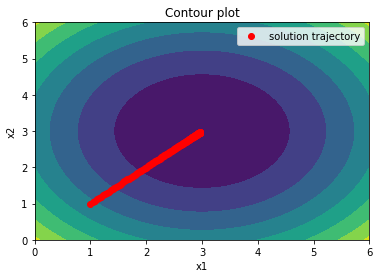

In [24]:
x1 = torch.linspace(0, 6, 100)
x2 = torch.linspace(0, 6, 100)

x1_grid, x2_grid = torch.meshgrid(x1, x2)

z = f(x1_grid, x2_grid)

plt.contourf(x1_grid, x2_grid, z)
plt.plot(trajectory_x1, trajectory_x2, 'ro', label='solution trajectory')

plt.title('Contour plot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

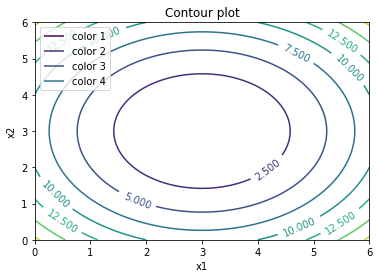

In [25]:
x1 = torch.linspace(0, 6, 100)
x2 = torch.linspace(0, 6, 100)

x1_grid, x2_grid = torch.meshgrid(x1, x2)

z = f(x1_grid, x2_grid)

CS = plt.contour(x1_grid, x2_grid, z)
plt.clabel(CS, inline=1, fontsize=10)

plt.title('Contour plot')
plt.xlabel('x1')
plt.ylabel('x2')

labels = ['color 1', 'color 2','color 3','color 4']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

plt.legend(loc='upper left')

plt.show()

##D3

In [26]:
def f(t):
  return -((0.3*0.5*400)/((0.3-0.1)*5))*(torch.exp(-0.1*t)-torch.exp(-0.3*t))

In [27]:
trajectory_t = []
trajectory_ft = []

t = torch.tensor(10.0, requires_grad=True)

trajectory_t.append(t.item())
trajectory_ft.append(f(t).item())

nr_steps = 100
eta = 0.1

for i in range(nr_steps):
  ft = f(t)
  ft.backward()
 
  with torch.no_grad():
    t -= eta * t.grad
  
  trajectory_t.append(t.item())
  trajectory_ft.append(f(t).item())
 
  t.grad.zero_()
 
print(f'Optimal concentration: {round(abs(ft.item()), 2)}')
if abs(min(trajectory_ft)) >= 25:
  print('The minimum threshold is reached.')
else:
  print('The minimum threshold is not reached.')

Optimal concentration: 23.09
The minimum threshold is not reached.


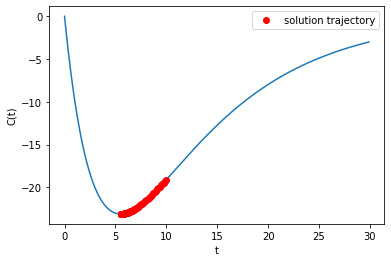

In [28]:
t_plot = torch.arange(0, 30, 0.1)
plt.figure() 
plt.plot(t_plot, f(t_plot))
plt.plot(trajectory_t, trajectory_ft, 'ro', label='solution trajectory')
plt.xlabel('t')
plt.ylabel('C(t)')
plt.legend()
plt.show()

##D4

In [29]:
def f_plot(x):
  return -math.exp(-math.pow(x-1,2))-5*math.exp(-math.pow(x-10,2))

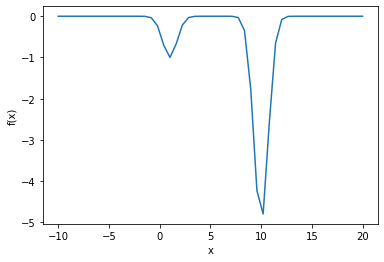

In [30]:
y_x = np.vectorize(f_plot)
x_plot = np.linspace(-10, 20)
y_plot = y_x(x_plot)
plt.plot(x_plot, y_plot)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [31]:
def f(x):
  return -torch.pow(math.e, -torch.pow(x-1, 2)) - 5*torch.pow(math.e, -torch.pow(x-10, 2))

The function has 2 local minimums.

Depending on the initial guess, gradient descent will find one minimum or the other. One of the disadvantages of this algorithm is that it might get stucked at a local minimum.

In [32]:
import random

In [33]:
nr_steps = 100

x0_value = 8.0
#x0_value = random.uniform(-10, 20)
x = torch.tensor(x0_value, requires_grad=True)

eta = 0.1

for i in range(nr_steps):
  fx = f(x)
  fx.backward()
  
  with torch.no_grad():
      x -= eta * x.grad

  x.grad.zero_()

print(x)

tensor(10., requires_grad=True)


A good initial startign point would be close to the global minimum (around x=10). It might be difficult to converge if we get an initial guess a bit far away from any of the minimums since the curve is flat. In fht curve is flat the gradient is close to 0 and the algorithm can't find a clear descent path.

##D5

In [34]:
def f(x1, x2):
  return torch.pow(torch.pow(x1, 2) + x2-11, 2) + torch.pow(x1 + torch.pow(x2, 2) - 7, 2)

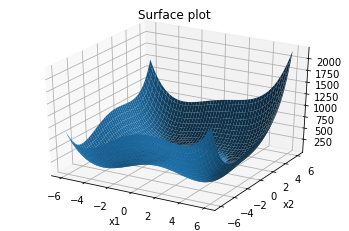

In [35]:
x_plot = torch.linspace(-6, 6, 100)
y_plot = torch.linspace(-6, 6, 100)

x_grid, y_grid = torch.meshgrid(x_plot, y_plot)

z = f(x_grid, y_grid)

ax = plt.axes(projection='3d')
ax.plot_surface(x_grid.numpy(), y_grid.numpy(), z.numpy())
ax.set_title('Surface plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

There seems to be 4 minimums

In [36]:
initial_points = [(-3.0, 3.0), (-4.0, -3.0), (4.0, -2.0), (4.0, 2.0)]

for x1,x2 in initial_points:
  
  nr_steps = 200
  eta = 0.01

  x = torch.tensor([x1, x2], requires_grad=True)

  for i in range(1, nr_steps):
    fx = f(x[0], x[1])
    fx.backward()

    with torch.no_grad():
      x -= eta * x.grad

    x.grad.zero_()
  
  print(f'optimal point: ({round(x[0].item(), 2)}, {round(x[1].item(), 2)}) -> f={round(f(x[0], x[1]).item(), 2)}')

optimal point: (-2.81, 3.13) -> f=0.0
optimal point: (-3.78, -3.28) -> f=0.0
optimal point: (3.58, -1.85) -> f=0.0
optimal point: (3.0, 2.0) -> f=0.0


The 4 optimal points have the same value, therefore, the 4 minimums are global